<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Стационарность-ряда" data-toc-modified-id="Стационарность-ряда-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Стационарность ряда</a></span></li><li><span><a href="#Разность-временного-ряда" data-toc-modified-id="Разность-временного-ряда-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Разность временного ряда</a></span></li><li><span><a href="#Проверим-автокорреляцию-между-временным-рядом" data-toc-modified-id="Проверим-автокорреляцию-между-временным-рядом-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Проверим автокорреляцию между временным рядом</a></span></li></ul></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Подготовка--данных" data-toc-modified-id="Подготовка--данных-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Подготовка  данных</a></span></li></ul></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Cледующий-час,-как-предыдущий" data-toc-modified-id="Cледующий-час,-как-предыдущий-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Cледующий час, как предыдущий</a></span></li><li><span><a href="#DummyRegressor" data-toc-modified-id="DummyRegressor-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>DummyRegressor</a></span></li><li><span><a href="#LinearRegresison" data-toc-modified-id="LinearRegresison-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>LinearRegresison</a></span></li><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>RandomForest</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

import catboost as cb
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit

from statsmodels.tsa.seasonal import seasonal_decompose

In [32]:
data = pd.read_csv(r'/datasets/taxi.csv',parse_dates =[0],index_col=0)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
num_orders    26496 non-null int64
dtypes: int64(1)
memory usage: 414.0 KB


In [34]:
# провереим верменной ряд на монотонность
data.index.is_monotonic

True

Сортировка временного ряда не нужна, данные расположены последовательно, идем дальше.

In [35]:
#ресемплируем данные
data = data.resample('1H').sum()

## Анализ

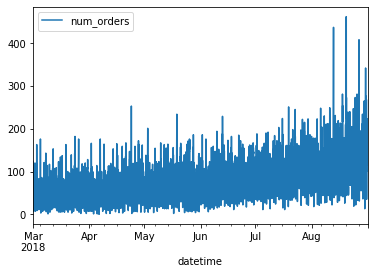

In [36]:
# посмотрим на сырые данные
data.plot();

Видим данные за 2018 год с марта по сентябрь. На первый взгляд среднее изменяется, СКО тоже немного. Поверим наши гипотезы.

In [37]:
#проанализироуем график на предмет трендов и сезонности
decomposed = seasonal_decompose(data)

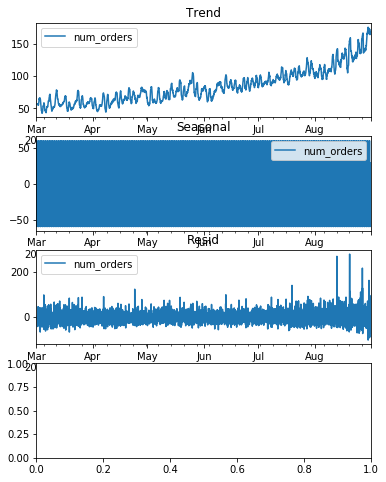

In [38]:
plt.figure(figsize=(6,8))
# Чтобы график корректно отобразился, указываем его
# оси ax, равными plt.gca() (англ. get current axis,
# получить текущие оси)

plt.subplot(411)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(412)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonal')
plt.subplot(413)
decomposed.resid.plot(ax=plt.gca())
plt.title('Resid')
plt.subplot(414)
# decomposed.weights.plot(ax=plt.gca())
# plt.title('Weights')

-	decomposed.trend — тренд;
-	decomposed.seasonal — сезонная составляющая;
-	decomposed.resid — остаток декомпозиции.
-	decomposed.weights — веса, используются для уменьшения влияния выбросов.

Видим что есть тренд на повышение цены. Сезонную и шумовые составляющие нужно рассматривать отдельно.


Text(0.5, 1.0, 'Seasonal')

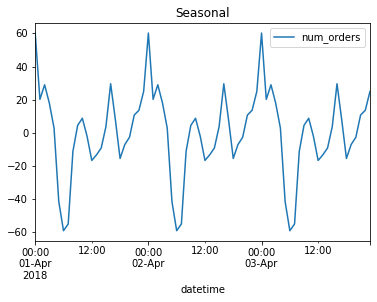

In [39]:
decomposed.seasonal['2018-04-1':'2018-04-3'].plot();
plt.title('Seasonal')

Видим, что есть сезонность в сутках. В утренние часы меньше всего заказов. 

Text(0.5, 1.0, 'residual')

<Figure size 864x288 with 0 Axes>

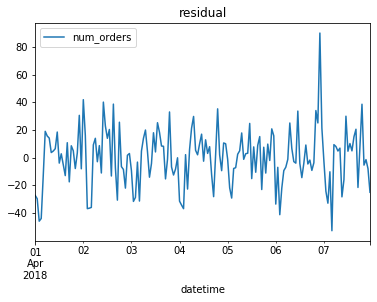

In [40]:
plt.figure(figsize=(12, 4))
decomposed.resid['2018-04-1':'2018-04-7'].plot();
plt.title('residual')

#### Стационарность ряда

Ряд называется нестационарным (англ. nonstationary stochastic process).
Узнать распределение временного ряда нельзя. Поэтому стационарные временные ряды (англ. stationary time series) — это ряды, у которых среднее и стандартное отклонение не меняются. 

Проверим ряд на стационарность т.к. прогнозировать нестационарные ряды сложнее

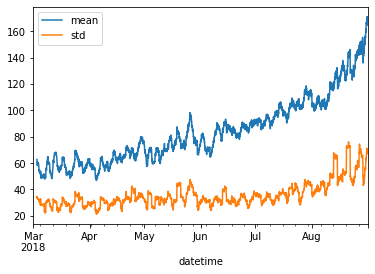

In [41]:
#Построим график средней и СКО
data['mean'] = data['num_orders'].rolling(50).mean()
data['std'] = data['num_orders'].rolling(50).std()
data.drop(columns=['num_orders']).plot()
plt.show()
data.drop(columns=['std','mean'],axis=1,inplace=True)
print()

Видим, что ряд не стационарный. Для прогнозирования нужно будет его привести к стационарному виду.

#### Разность временного ряда

In [42]:
# вычтем ряд сдвинутый на единицу

#data-=data.shift()

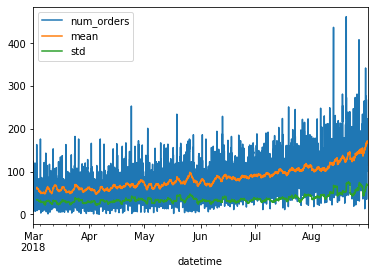

In [43]:
data['mean'] = data['num_orders'].rolling(50).mean()
data['std'] = data['num_orders'].rolling(50).std()
data.plot()
data.drop(columns=['std','mean'],axis=1,inplace=True)
data_shift=data.copy()


Видим признаки стационарного ряда среднее и СКО не изменяются.

In [44]:
def make_features(data, max_lag,rolling_mean_size):
    #data = data_shift.copy()
    #display(data.sample(3))
    data['hour'] = data.index.hour
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['days_in_month'] = data.index.days_in_month
    
    for lag in range(23,240,24):
        column = 'lag_'+str(lag+1)
        data[column] = data['num_orders'].shift(lag+1)
    
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    #удалим пропуски
    data.dropna(inplace=True)
    #display(data.sample(3))
    return data
    
    #создадим новые признаки - скользящее окно и временные лаги
data1 = make_features(data,10, 3).copy()
display(data1.head())


,num_orders,hour,month,day,dayofweek,days_in_month,lag_24,lag_48,lag_72,lag_96,lag_120,lag_144,lag_168,lag_192,lag_216,lag_240,rolling_mean
datetime,,,,,,,,,,,,,,,,,
2018-03-11 00:00:00,81,0,3,11,6,31,117.0,84.0,143.0,100.0,42.0,86.0,75.0,163.0,90.0,124.0,71.666667
2018-03-11 01:00:00,83,1,3,11,6,31,78.0,66.0,78.0,121.0,75.0,176.0,60.0,108.0,120.0,85.0,78.000000
2018-03-11 02:00:00,36,2,3,11,6,31,24.0,29.0,65.0,24.0,36.0,32.0,26.0,25.0,75.0,71.0,79.000000
2018-03-11 03:00:00,49,3,3,11,6,31,44.0,31.0,68.0,66.0,49.0,51.0,42.0,64.0,64.0,66.0,66.666667
2018-03-11 04:00:00,30,4,3,11,6,31,46.0,30.0,60.0,73.0,30.0,34.0,27.0,44.0,20.0,43.0,56.000000


Т.к. данные у нас цикличны, а в сутках 24 часа, в качестве лагов возьмем 10 суток подряд. Окно возьмем 3.

#### Проверим автокорреляцию между временным рядом

## Обучение

#### Подготовка  данных

In [45]:
features = data.drop(['num_orders'],axis=1)  # извлеките признаки
target = data['num_orders']
X_model, X_test, y_model, y_test = train_test_split(
    features, target, test_size=0.1,shuffle=False, random_state=890)

X_train, X_valid, y_train, y_valid = train_test_split(
X_model, y_model, test_size=0.25,shuffle=False, random_state=890)

### LinearRegression

In [46]:
model_LR = LinearRegression()
model_LR.fit(X_train,y_train)
y_pred = model_LR.predict(X_valid)
print('RMSE на валидационной выборке:',mean_squared_error(y_valid,y_pred)**0.5)

RMSE на валидационной выборке: 26.993080451960722


### RandomForestRegressor 

In [47]:
params = {'bootstrap': True,
#  'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': None,
#  'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': int(150),
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 890,
 'verbose': 0,
 'warm_start': False}

tscv = TimeSeriesSplit(n_splits=5)
rmse_cv =[]
for train_index, test_index in tscv.split(features):
    #берем срезы по индексам со всего датасэта
    #X_bacth_train = features.iloc[train_index] - так нельзя потому что у нас в индексах дата, а не число.
    X_batch_train = features.iloc[train_index]
    y_batch_train = target.iloc[train_index]
    X_batch_valid = features.iloc[test_index]
    y_batch_valid = target.iloc[test_index]
    
    #запускаем модель
    regr = RandomForestRegressor(**params)
    regr.fit(X_batch_train,y_batch_train)                    
    _y_pred = regr.predict(X_batch_valid) 
    
    #считаем сколько частей датасэта
    volume_percent = train_index[-1]/features.shape[0]
    #print('Индексы CV train от {} до {}'.format(train_index[0],train_index[-1]))
    #print('Индексы CV test от {} до {}'.format(test_index[0],test_index[-1]))
    rmse = mean_squared_error(y_batch_valid,_y_pred)**0.5
    print('RMSE на {:.1%} датасэта равно {:.2f}:'.format(volume_percent,rmse))
    rmse_cv.append(rmse)
print('RMSE на всем датасэте:',np.mean(rmse_cv)
     )

RMSE на 16.6% датасэта равно 19.80:
RMSE на 33.3% датасэта равно 20.83:
RMSE на 50.0% датасэта равно 22.45:
RMSE на 66.6% датасэта равно 25.08:
RMSE на 83.3% датасэта равно 38.68:
RMSE на всем датасэте: 25.368452114103256


## Тестирование

### Cледующий час, как предыдущий

In [50]:
data1 = pd.DataFrame(y_test.copy(),columns=['num_orders'])
data1['num_orders_pred'] = data1['num_orders'].shift(1)
data1.dropna(inplace=True)
mean_squared_error(data1['num_orders'],data1['num_orders_pred'])**0.5

59.15988578700043


<div class="alert alert-warning">
<h1>Комментарий ревьюера v2 <a class="tocSkip"></a></h1>
Так мы же на тесте результат у дамми хотим, разве нет?)</div>

### DummyRegressor

In [51]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="median")
dummy_regr.fit(X_train, y_train)
mean_squared_error(y_test,dummy_regr.predict(X_test))**0.5

92.7865276477068

Не самамя лучшая идея предсказывать значением предыдущего часа, будем проводить анализ дальше

### LinearRegresison

In [53]:
y_pred_test = model_LR.predict(X_test)
print('RMSE на тестовой выборке:',mean_squared_error(y_test,y_pred_test)**0.5)

RMSE на тестовой выборке: 35.239668464580724


In [ ]:
# посмотрим на разброс предсказанных и фактических значений
sns.regplot(y_pred_test,y_test)
plt.show()

### RandomForest

In [55]:
y_pred_test = regr.predict(X_test)
print('RMSE на тестовой выборке:',mean_squared_error(y_test,y_pred_test)**0.5)

RMSE на тестовой выборке: 42.10490383869106


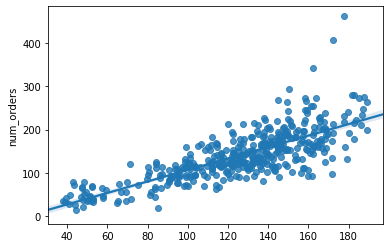

In [56]:
# посмотрим на разброс предсказанных и фактических значений
sns.regplot(y_pred_test,y_test)
plt.show()

Из графика видно что модель точнее при небольшом количестве заказов, чем заказов больше, тем больше виден разброс

Благодаря генерированию фич и подбора гиперпараметров мы добились удоавлетворительной точности прогноза поездок. Наша модель прогнозирует с точностью 35 поездок в час. Это немногим больше чем модель "В следующием часу больше чем в предыдущем" 39 поездок, но уже точнее чем случайная модель 55 поездок.

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Данные проанализированы
- [ ]  Модель обучена, гиперпараметры подобраны
- [ ]  Качество моделей проверено, выводы сделаны
- [ ]  Значение *RMSE* на тестовой выборке не больше 48